# Import packages & install packages

In [45]:
import os
import pandas as pd
import numpy as np

# Load Dataset

https://www.kaggle.com/datasets/arunjangir245/airline-flight-dataset-schedule-performance-etc/data 

In [46]:
current_directory = os.getcwd()
weather_data_path = os.path.join(current_directory, "archive", "05-2019.csv")
data  = pd.read_csv(weather_data_path)  
print(data .head())

  carrier_code  flight_number origin_airport destination_airport        date  \
0           AS            121            SEA                 ANC  2019-05-01   
1           F9            402            LAX                 DEN  2019-05-01   
2           F9            662            SFO                 DEN  2019-05-01   
3           F9            790            PDX                 DEN  2019-05-01   
4           AS            108            ANC                 SEA  2019-05-01   

   scheduled_elapsed_time tail_number  departure_delay  arrival_delay  \
0                     215      N615AS               -8            -16   
1                     147      N701FR               17             -4   
2                     158      N346FR               44             27   
3                     156      N332FR               24             10   
4                     210      N548AS               -9            -31   

   delay_carrier  ...  HourlyPrecipitation_x  HourlyStationPressure_x  \
0      

# PCA Reduction

## Using HW3 PCA Code

In [58]:
#carrier_code	flight_number	origin_airport	destination_airport	date	
# scheduled_elapsed_time	tail_number	departure_delay	arrival_delay	
# delay_carrier	delay_weather	delay_national_aviation_system	delay_security	
# delay_late_aircarft_arrival	cancelled_code	year	month	day	weekday	
# scheduled_departure_dt	scheduled_arrival_dt	actual_departure_dt	actual_arrival_dt	
# STATION_x	HourlyDryBulbTemperature_x	HourlyPrecipitation_x	HourlyStationPressure_x	
# HourlyVisibility_x	HourlyWindSpeed_x	STATION_y	HourlyDryBulbTemperature_y	
# HourlyPrecipitation_y	HourlyStationPressure_y	HourlyVisibility_y	HourlyWindSpeed_y

# Replace "N" with 0 and "B" with 1 in the cancelled_code column
data['cancelled_code'] = np.where(data['cancelled_code'] == 'N', 0, 1)

###### FLIGHT
flight_columns = ["flight_number", "scheduled_elapsed_time", "cancelled_code"]
flight_data = data[flight_columns]
flight_data_cleaned = flight_data.dropna()

###### WEATHER
weather_columns = [
    "HourlyDryBulbTemperature_x", 
    "HourlyPrecipitation_x", "HourlyStationPressure_x", "HourlyVisibility_x", 
    "HourlyWindSpeed_x", "HourlyDryBulbTemperature_y", 
    "HourlyPrecipitation_y", "HourlyStationPressure_y", 
    "HourlyVisibility_y", "HourlyWindSpeed_y"
]
weather_data = data[weather_columns]
weather_data_cleaned = weather_data.dropna()

# For the arrival_delay, convert to numeric and handle non-numeric values
arrival_delay = pd.to_numeric(data['arrival_delay'], errors='coerce')
# Drop NaN values
arrival_delay = arrival_delay.dropna()
# Convert to numpy array for scaling
y = arrival_delay.values

# Now scale with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y_normalized = scaler.fit_transform(y.reshape(-1, 1)).flatten()

# For the other scaling operations, ensure numeric data only
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()

flight_scaled_data = scaler_std.fit_transform(flight_data_cleaned)
# For weather data, ensure all columns are numeric
numeric_weather_cols = weather_data_cleaned.select_dtypes(include=['number']).columns
weather_scaled_data = scaler_std.fit_transform(weather_data_cleaned[numeric_weather_cols])                                               


In [60]:
from weather_pca import PCA
###### FLIGHT
# Initialize PCA
flight_pca = PCA()

# Fit PCA on the scaled data
flight_pca.fit(flight_scaled_data)

# Transform data to reduce dimensions (e.g., retain 2 principal components)
flight_reduced_data = flight_pca.transform(flight_scaled_data, K=3)

print("Flight Reduced Data Shape:", flight_reduced_data.shape)

###### WEATHER
# Initialize PCA
weather_pca = PCA()

# Fit PCA on the scaled data
weather_pca.fit(weather_scaled_data)

# Transform data to reduce dimensions (e.g., retain 2 principal components)
weather_reduced_data = weather_pca.transform(weather_scaled_data, K=3)


Flight Reduced Data Shape: (694336, 3)


X train pca shape: (553397, 3)
X test pca shape: (138350, 3)
Y train shape: (553397,)
Sampled X shape: (5000, 3)
Sampled y shape: (5000,)


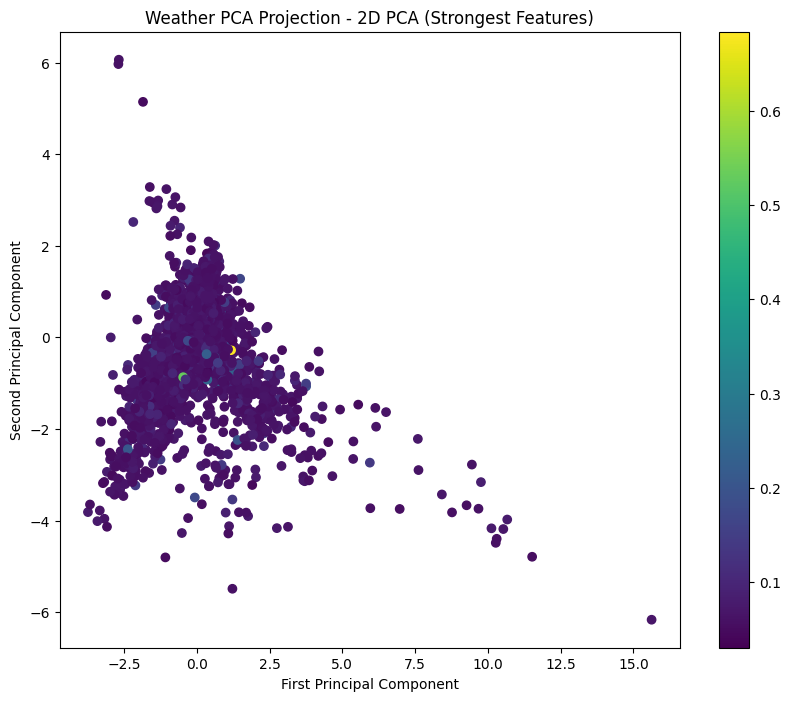

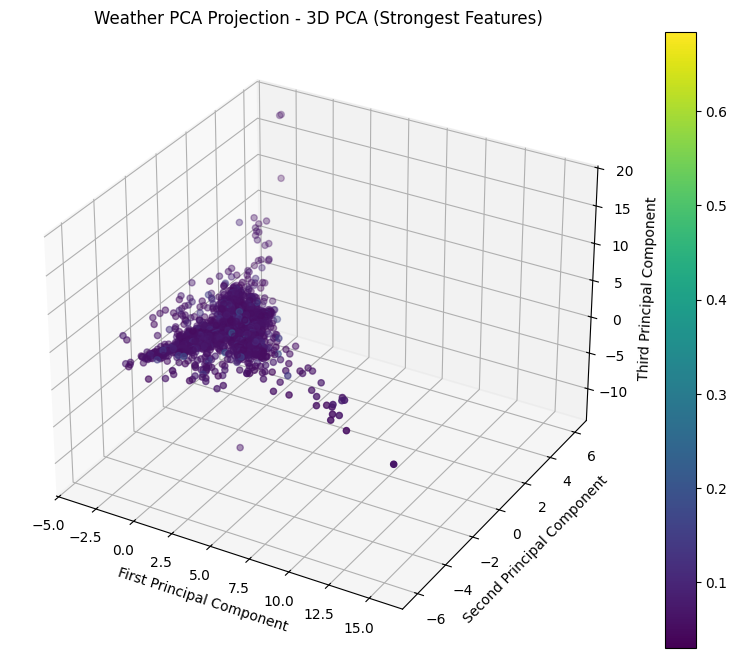

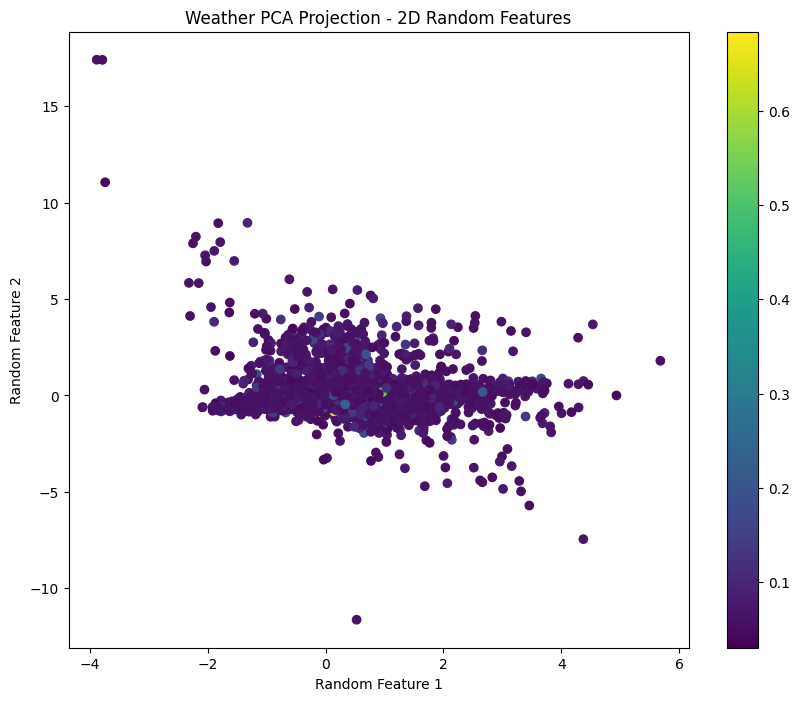

In [63]:
from sklearn.model_selection import train_test_split

# Option 1: Truncate both arrays to the minimum length
min_length = min(len(weather_reduced_data), len(y_normalized))
weather_reduced_data_matched = weather_reduced_data[:min_length]
y_normalized_matched = y_normalized[:min_length]

# Now use these matched arrays for the split
X_train, X_test, y_train, y_test = train_test_split(
    weather_reduced_data_matched, y_normalized_matched, test_size=0.2, random_state=42
)


# Initialize PCA
pca = PCA()

X_train_np = X_train.astype(float)
X_test_np = X_test.astype(float)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit PCA on the scaled data
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled, K=3)
X_test_pca = pca.transform(X_test_scaled, K=3)

print(f"X train pca shape: {X_train_pca.shape}")
print(f"X test pca shape: {X_test_pca.shape}")
print(f"Y train shape: {y_train.shape}")

# Randomly choose indices
sample_size = min(5000, len(y_train))  # Ensure sample size does not exceed available data
indices = np.random.choice(len(y_train), size=sample_size, replace=False)

# Subset the data
X_sample = X_train_pca[indices]
y_sample = y_train[indices]  # Use direct indexing for NumPy arrays

print("Sampled X shape:", X_sample.shape)
print("Sampled y shape:", y_sample.shape)

pca.visualize(X=X_sample, y=y_sample, fig_title="Weather PCA Projection")



X train pca shape: (555468, 3)
X test pca shape: (138868, 3)
Y train shape: (555468,)
Sampled X shape: (5000, 3)
Sampled y shape: (5000,)


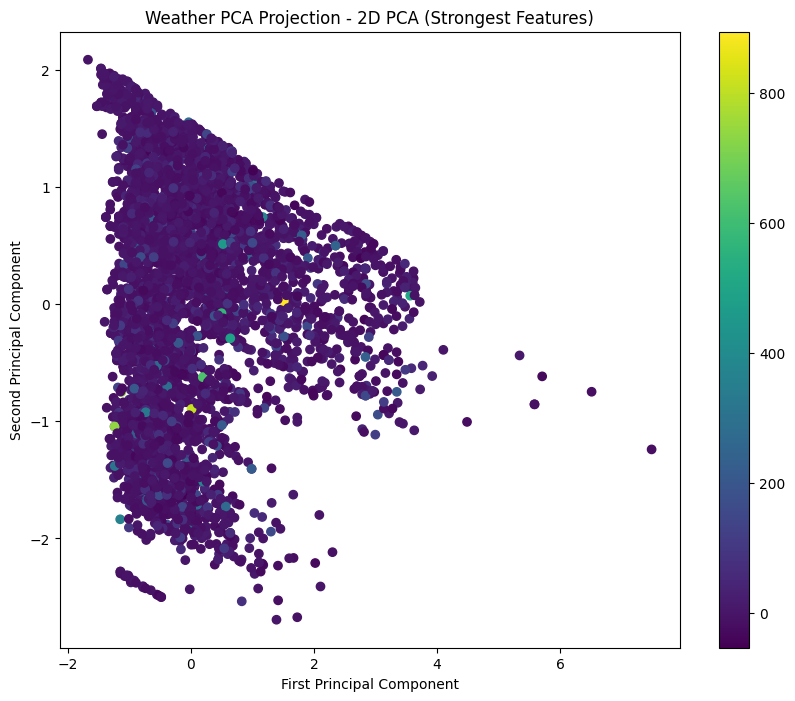

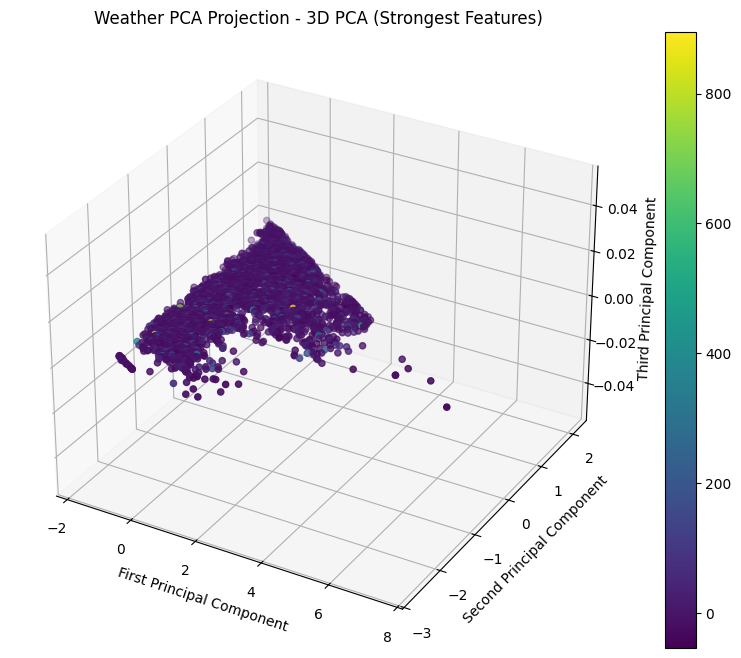

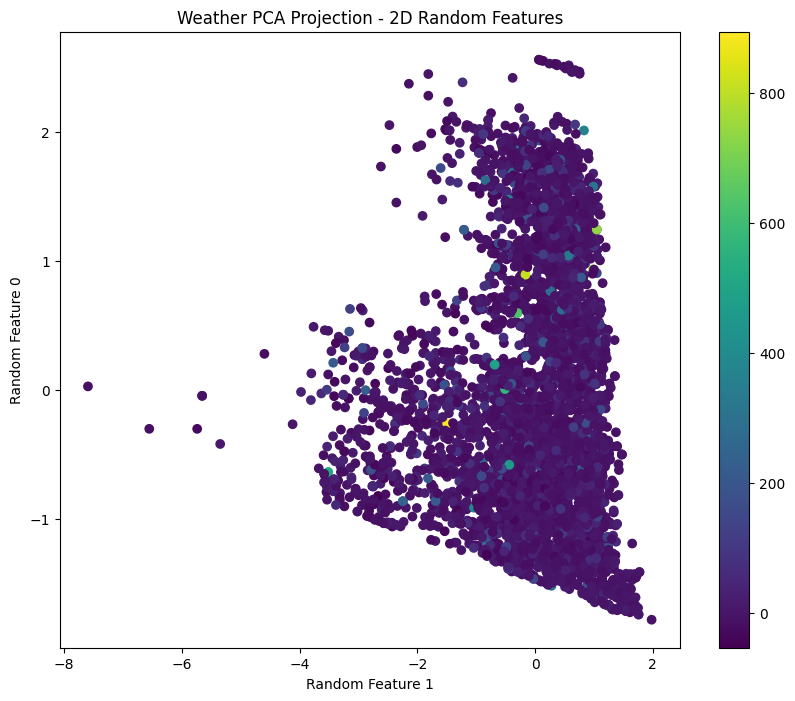

In [64]:
# Now use these matched arrays for the split
X_train, X_test, y_train, y_test = train_test_split(
    flight_reduced_data, y, test_size=0.2, random_state=42
)

# Initialize PCA
pca = PCA()

X_train_np = X_train.astype(float)
X_test_np = X_test.astype(float)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit PCA on the scaled data
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled, K=3)
X_test_pca = pca.transform(X_test_scaled, K=3)

print(f"X train pca shape: {X_train_pca.shape}")
print(f"X test pca shape: {X_test_pca.shape}")
print(f"Y train shape: {y_train.shape}")

# Randomly choose indices
sample_size = min(5000, len(y_train))  # Ensure sample size does not exceed available data
indices = np.random.choice(len(y_train), size=sample_size, replace=False)

# Subset the data
X_sample = X_train_pca[indices]
y_sample = y_train[indices]  # Use direct indexing for NumPy arrays

print("Sampled X shape:", X_sample.shape)
print("Sampled y shape:", y_sample.shape)

pca.visualize(X=X_sample, y=y_sample, fig_title="Weather PCA Projection")


In [65]:
reduced_df = pd.DataFrame(weather_reduced_data, columns=['PC1', 'PC2', 'PC3'])
reduced_df.to_csv('weather_reduced_05_2019.csv', index=False)

reduced_df = pd.DataFrame(flight_reduced_data, columns=['PC1', 'PC2', 'PC3'])
reduced_df.to_csv('flight_reduced_05_2019.csv', index=False)